Bisection method, regula falsi, and now Newton’s method. <br>
Which functions can these algorithms be applied to? <br>
Can you predict how many iterations they will require?<br>
Is it possible that they will not converge?<br>
Is it possible that they will converge, but not to the nearest root?<br>
Is it possible that they will converge to a value that is not a root?<br>
Is it possible that there is a root within the initial range that they do not find?<br>

## Bisection
The method is guaranteed to converge to a root of a function (f) if f is continuous on the interval [a, b] and f(a) and f(b) have opposite signs. 
The absolute error is halved at each step so the method converges linearly, which can be comparatively slow, but the number of iterations taken to converge is found to be always 27 if the range chosen is small enough (~1).


## Regula falsi: 
    
Convergence can be slow when the curvature of function is large, as shown by evaluating g,k,n [g,k,n](#Bisection and Regula Falsi evaluations) (i.e. when the linear approximation is not good)

Since a and b are chosen such that f(a) and f(b) are of opposite signs, at each step, one of the end-points will get closer to a root of f. If the second derivative of f is of constant sign in the interval, then one endpoint remains fixed for all subsequent iterations while the converging endpoint becomes updated. As a result, unlike the bisection method, the width of the bracket does not tend to zero (unless the zero is at an inflection point around which sign(f ) = −sign(f ")). As a consequence, the linear approximation to f(x), which is used to pick the false position, does not improve as rapidly as possible.

One example of this phenomenon is the function

{\displaystyle f(x)=2x^{3}-4x^{2}+3x} f(x)=2x^{3}-4x^{2}+3x
on the initial bracket [−1,1]. The left end, −1, is never replaced (it does not change at first and after the first three iterations, f " is negative on the interval) and thus the width of the bracket never falls below 1. Hence, the right endpoint approaches 0 at a linear rate (the number of accurate digits grows linearly, with a rate of convergence of 2/3).[citation needed]

For discontinuous functions, this method can only be expected to find a point where the function changes sign (for example at x = 0 for 1/x or the sign function). In addition to sign changes, it is also possible for the method to converge to a point where the limit of the function is zero, even if the function is undefined (or has another value) at that point (for example at x = 0 for the function given by f (x) = abs(x) − x2 when x ≠ 0 and by f (0) = 5, starting with the interval [-0.5, 3.0]). It is mathematically possible with discontinuous functions for the method to fail to converge to a zero limit or sign change, but this is not a problem in practice since it would require an infinite sequence of coincidences for both endpoints to get stuck converging to discontinuities where the sign does not change, for example at x = ±1 in

{\displaystyle f(x)={\frac {1}{(x-1)^{2}}}+{\frac {1}{(x+1)^{2}}}.} {\displaystyle f(x)={\frac {1}{(x-1)^{2}}}+{\frac {1}{(x+1)^{2}}}.}
The method of bisection avoids this hypothetical convergence problem.

## Newton-Raphson
    
If the initial guess is “sufficiently close” to the solution, the
algorithm has quadratic convergence.


Overshoot
If the first derivative is not well behaved in the neighborhood of a particular root, the method may overshoot, and diverge from that root. An example of a function with one root, for which the derivative is not well behaved in the neighborhood of the root, is

{\displaystyle f(x)=|x|^{a},\quad 0<a<{\tfrac {1}{2}}} f(x)=|x|^{a},\quad 0<a<{\tfrac {1}{2}}
for which the root will be overshot and the sequence of x will diverge. For a = 
1
/
2
, the root will still be overshot, but the sequence will oscillate between two values. For 
1
/
2
 < a < 1, the root will still be overshot but the sequence will converge, and for a ≥ 1 the root will not be overshot at all.

In some cases, Newton's method can be stabilized by using successive over-relaxation, or the speed of convergence can be increased by using the same method.

Stationary point
If a stationary point of the function is encountered, the derivative is zero and the method will terminate due to division by zero.

Poor initial estimate
A large error in the initial estimate can contribute to non-convergence of the algorithm. To overcome this problem one can often linearise the function that is being optimized using calculus, logs, differentials, or even using evolutionary algorithms, such as the stochastic funnel algorithm. Good initial estimates lie close to the final globally optimal parameter estimate. In nonlinear regression, the sum of squared errors (SSE) is only "close to" parabolic in the region of the final parameter estimates. Initial estimates found here will allow the Newton–Raphson method to quickly converge. It is only here that the Hessian matrix of the SSE is positive and the first derivative of the SSE is close to zero.

Mitigation of non-convergence
In a robust implementation of Newton's method, it is common to place limits on the number of iterations, bound the solution to an interval known to contain the root, and combine the method with a more robust root finding method.

Slow convergence for roots of multiplicity greater than 1
If the root being sought has multiplicity greater than one, the convergence rate is merely linear (errors reduced by a constant factor at each step) unless special steps are taken. When there are two or more roots that are close together then it may take many iterations before the iterates get close enough to one of them for the quadratic convergence to be apparent. However, if the multiplicity {\displaystyle m} m of the root is known, the following modified algorithm preserves the quadratic convergence rate:[3]

{\displaystyle x_{n+1}=x_{n}-m{\frac {f(x_{n})}{f'(x_{n})}}.} {\displaystyle x_{n+1}=x_{n}-m{\frac {f(x_{n})}{f'(x_{n})}}.}
This is equivalent to using successive over-relaxation. On the other hand, if the multiplicity m of the root is not known, it is possible to estimate {\displaystyle m} m after carrying out one or two iterations, and then use that value to increase the rate of convergence.

In [ ]:
When solving one equation, or just a few, using a computer, the bisection method is an adequate choice. Although bisection isn't as fast as the other methods—when they're at their best and don't have a problem—bisection nevertheless is guaranteed to converge at a useful rate, roughly halving the error with each iteration – gaining roughly a decimal place of accuracy with every 3 iterations.

Then, a program could start with Newton's method, and, if Newton's isn't converging, switch to regula falsi, maybe in one of its improved versions, such as the Illinois or Anderson-Bjőrk versions. Or, if even that isn't converging as well as bisection would, switch to bisection, which always converges at a useful, if not spectacular, rate.

When the change in y has become very small, and x is also changing very little, then Newton's method most likely will not run into trouble, and will converge. So, under those favorable conditions, one could switch to Newton's method if one wanted the error to be very small and wanted very fast convergence.

# Importing relevant functions from libraries

In [48]:
%matplotlib inline
from pylab import plot,figure,grid, linspace, figure, cos, sin, tan, exp, logspace, loglog, xlabel, ylabel, title, legend
import numpy as np
import matplotlib.pyplot as plt
from scipy import diff

# Bisection functions

In [126]:
def bisection_step(f, bounds):
    """Performs one step of the bisection algorithm to locate a root of f, 
    and returns a smaller range in which the root is found."""
    lower, upper = bounds      
    middle = (lower + upper)/2
    
    if f(lower)*f(middle)<0:
        return(lower,middle)
    else:
        return (middle,upper)
    
def bisection_iteration(function,bounds):
    "Performs several steps of the bisection method until a specified accuracy is reached"
    n=0 #step counter
    lower,upper=bounds
    while abs(upper-lower) >1e-8:
        lower,upper=bisection_step(function,(lower,upper))
        n+=1
        
    return (n,lower)

# Regula Falsi functions

In [9]:
def regula_falsi_step(function, bounds):
    """Performs one step of the regula falsi algorithm to locate a root of f, 
    and returns a smaller range in which the root is found."""
    
    lower, upper = bounds

    middle=(lower*function(upper)-upper*function(lower))/(function(upper)-function(lower))
    
    if function(lower)*function(middle)<0:
        return (lower, middle)
    else:
        return (middle,upper)
    
def iterate_regula_falsi(function,bounds):
    """Performs several steps of the regula falsi algorithm until a specified accuracy is reached."""
    n=0 #step counter
    lower, upper = bounds 
    while abs(function(lower))>1e-8 and abs(function(upper))>1e-8:
        lower, upper = regula_falsi_step(function,(lower,upper))
        n+=1
    return (n,lower)

# Newton-Raphson functions

In [62]:
def newton_step(f, fp, x0):
    """Perform one step of the Newton-Raphson algorithm."""
    return x0 - f(x0)/fp(x0) 

def newton_iteration(f,fp,guess):
    """"Perfoms several steps of the Newton-Raphson algorith until a specific accuracy is reached"""
    n=1
    x=1
    xn=newton_step(f,fp,guess)
    while abs(x-xn) > 1e-8:
        n +=1
        a=xn
        xn=newton_step(f,fp,xn)
        x=a
    return (xn,n)

# Functions used to test algorithms

In [118]:
#function e.g. g, and its derivative e.g. gp
def f(x):
    return x**2 - 2
def fp(x):
    return 2*x
def h(x):
    return x**3 -2*x +2
def hp(x):
    return 3*x**2 -2
def g(x):                              
    return x**8-2*x -1
def gp(x):
    return 8*x**7-2
def h(x):
    return (x-1)/(x-2)
def j(x):
    return x**3+47*x**2 -148*x +90
def k(x):
    return x**4 -8*x**3 +22*x**2 -24*x +9
def l(x):
    return cos(x)
def lp(x):
    return -sin(x)
def m(x):
    return tan(x)-x
def n(x): # mp
    return tan(x)*((1/cos(x))**2)
def mu(x):
    if x>=0:
        return np.sqrt(x)
    else:
        return -np.sqrt(-x)
mu = np.vectorize(mu)    

def mup(x):
    return diff(mu,x)
mup = np.vectorize(mup)

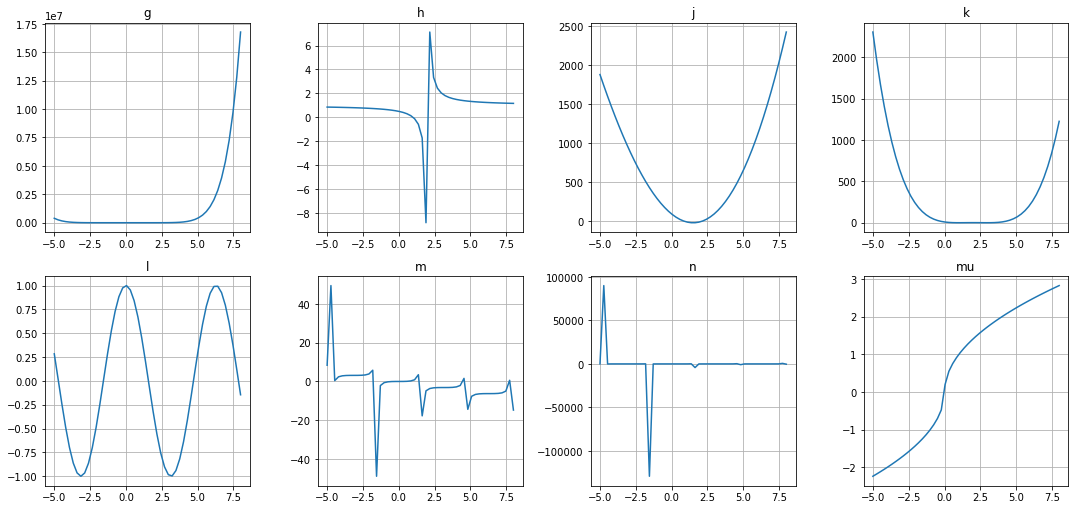

In [12]:
x = np.linspace(-5.0, 8.0)

y=[g(x),h(x),j(x),k(x),l(x),m(x),n(x),mu(x)]

title="g h j k l m n mu".split(" ")

fig = plt.figure(figsize=(15,14))

for i in range(1,9):
    plt.subplot(4,4,i)
    plt.plot(x,y[i-1])
    plt.title(title[i-1])
    grid()
plt.tight_layout()

In [128]:
bisection_iteration(j,(0,300))

(35, 299.99999999126885)

In [37]:
#Run bisection and regula falsi algorithms for functions g-n

b_g=bisection_iteration(g,(1,2))
r_g=iterate_regula_falsi(g,(1,2))

b_h=bisection_iteration(h,(0.5,1.5))
r_h=iterate_regula_falsi(h,(0.5,1.5))

b_j=bisection_iteration(j,(0.5,1.5))
r_j=iterate_regula_falsi(j,(0.5,1.5))

b_k=bisection_iteration(k,(0.5,1.5))
r_k=iterate_regula_falsi(k,(0.5,1.5))

b_l=bisection_iteration(l,(0.5,1.5))
r_l=iterate_regula_falsi(l,(0.5,1.5))

b_n=bisection_iteration(n,(0.5,1.5))
r_n=iterate_regula_falsi(n,(0.5,1.5))

# Bisection and Regula Falsi evaluations

In [116]:
# Number of iterations (n) and roots of graohs g-n found using Bisection and Regula-Falsi

print("{:^15}   {:^15}         {:^15}".format("Function", "Bisection", "Regula Falsi"))
print("         {:^15}{:^15}{:^15}{:^15}".format("n", "Root","n", "Root")+"\n")
print("{:^15} {:d}  {:15.5f}       {:d}    {:16.5f}".format("g", b_g[0],b_g[1],r_g[0],r_g[1]))
print("{:^15} {:d}  {:15.5f}       {:d}    {:17.5f}".format("h", b_h[0],b_h[1],r_h[0],r_h[1]))
print("{:^15} {:d}  {:15.5f}       {:d}    {:17.5f}".format("j", b_j[0],b_j[1],r_j[0],r_j[1]))
print("{:^15} {:d}  {:15.5f}       {:d}    {:15.5f}".format("k", b_k[0],b_k[1],r_k[0],r_k[1]))
print("{:^15} {:d}  {:15.5f}       {:d}    {:18.5f}".format("l", b_l[0],b_l[1],r_l[0],r_l[1]))
print("{:^15} {:d}  {:15.5f}       {:d}    {:14.5f}".format("n", b_n[0],b_n[1],r_n[0],r_n[1]))

   Function          Bisection             Regula Falsi  
                n            Root             n            Root      

       g        27          1.16200       278             1.16200
       h        27          1.50000       26              1.00000
       j        27          0.83162       14              0.50000
       k        27          1.50000       5626            1.00005
       l        27          1.50000       4               1.57080
       n        27          1.50000       33678           0.00000


In [46]:

newton_iteration(f,fp,10**5) # takes greater number of steps to converge to root
newton_iteration(f,fp,-1) #negative starting point gives negative root
#newton_iteration(f,fp,0) produces division by zero error


1.4142135623730951 21
-1.4142135623730951 5


In [123]:
nf7 = newton_iteration(f,fp,7)
nf5 = newton_iteration(f,fp,10**5)
nf1 = newton_iteration(f,fp,-1)
nm4 = newton_iteration(m,n,4) # Great number of iterations when initial guess is ~.7 away from root, or when gradient is small ?
nm45 = newton_iteration(m,n,4.5) 
nm8 = newton_iteration(m,n,8)
nm7 = newton_iteration(m,n,7)

In [ ]:
# nf0 = newton_iteration(f,fp,0) produces division by zero error

# Newton-Raphson Evaluations

In [125]:
print("{:^15} {:^15}  {:^15} {:^15} ".format("Function", "Guess" , "n", "Root")+"\n")

print("{:^15} {:11.5f}  {:12d} {:18.5f}".format("f", float(7), nf7[1], nf7[0]))
print("{:^15} {:11.5f}  {:12d} {:17.5f}".format("f", float(10**5), nf5[1], nf5[0]))
print("{:^15} {:11.5f}  {:12d} {:18.5f}".format("f", float(-1), nf1[1], nf1[0]))
print("{:^15} {:11.5f}  {:13d} {:17.5f}".format("m", float(4), nm4[1], nm4[0]))
print("{:^15} {:11.5f}  {:13d} {:17.5f}".format("m", float(4.5), nm45[1], nm45[0]))
print("{:^15} {:11.5f}  {:13d} {:17.5f}".format("m", float(8), nm8[1], ng8[0]))
print("{:^15} {:11.5f}  {:13d} {:17.5f}".format("m", float(7), nm7[1], nm7[0]))

   Function          Guess              n             Root       

       f            7.00000             7            1.41421
       f        100000.00000            21           1.41421
       f           -1.00000             5           -1.41421
       m            4.00000           9944           4.71249
       m            4.50000             52           4.49341
       m            8.00000           9939           1.16200
       m            7.00000           9326          10.99567


In [122]:
newton_iteration(m,n,1)

(0.00017318603776337755, 17315)